# Домашнее задание №5
## EDA-анализ: белки микроорганизма *Pseudomonas aeruginosa*
### 1. Введение
####Данный датасет содержит данные о свойствах белков бактерии *Pseudomonas aeruginosa*. 
В датасете представлены такие характеристики белков, как последовательность аминокислот, молекулярная масса, изоэлектрическая точка, длина белковых молекул, состав аминокислот и гидрофобность
Цель: оценить качество представленных данных и выявить основные закономерности.
Импорт основных библиотек для дальнейшего анализа

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Импорт датасета и первичный осмотр данных

In [6]:
data = pd.read_csv('/home/dasha/Desktop/Data-engineering_project/pseudomonas_aeruginosa.csv')  
print("✅ Данные успешно загружены из 'pseudomonas_aeruginosa.csv'")
print(f"📊 Размер датасета: {data.shape}")
print(f"📊 Колонки: {list(data.columns)}")

✅ Данные успешно загружены из 'pseudomonas_aeruginosa.csv'
📊 Размер датасета: (1000, 8)
📊 Колонки: ['ID', 'Name', 'Sequence', 'Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Amino_Acid_Composition', 'Hydrophobicity']


### 3. Оценка структуры данных

In [8]:
print("\nТипы данных:")
print(data.dtypes)

print("\nПервые 5 строк:")
print(data.head())


Типы данных:
ID                         object
Name                       object
Sequence                   object
Molecular_Weight          float64
Isoelectric_Point         float64
Protein_Length              int64
Amino_Acid_Composition     object
Hydrophobicity            float64
dtype: object

Первые 5 строк:
               ID  ... Hydrophobicity
0  WP_369686368.1  ...       0.339286
1  WP_369686367.1  ...      -0.146774
2  WP_369686366.1  ...      -0.406173
3  WP_369686365.1  ...      -0.591379
4  WP_369686364.1  ...       0.141176

[5 rows x 8 columns]


### 4. Оценка целостности и полноты данных

In [10]:
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100

missing_info = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percent
})

print("Пропущенные значения:")
print(missing_info[missing_info['Пропусков'] > 0])

if missing_data.sum() > 0:
    plt.figure(figsize=(10, 4))
    missing_data[missing_data > 0].plot(kind='bar', color='coral')
    plt.title('Распределение пропущенных значений')
    plt.ylabel('Количество пропусков')
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

Пропущенные значения:
Empty DataFrame
Columns: [Пропусков, Процент]
Index: []


### 5. Оценка плотности распределения данных с помщью KDE-Plot (Kernel Density Estimate). Позволяет провести плавную оценку плотности вероятности, выяснить где "сконцентрированы" данные и форму распределения: нормальное, скошенное, бимодальное и т.д. 

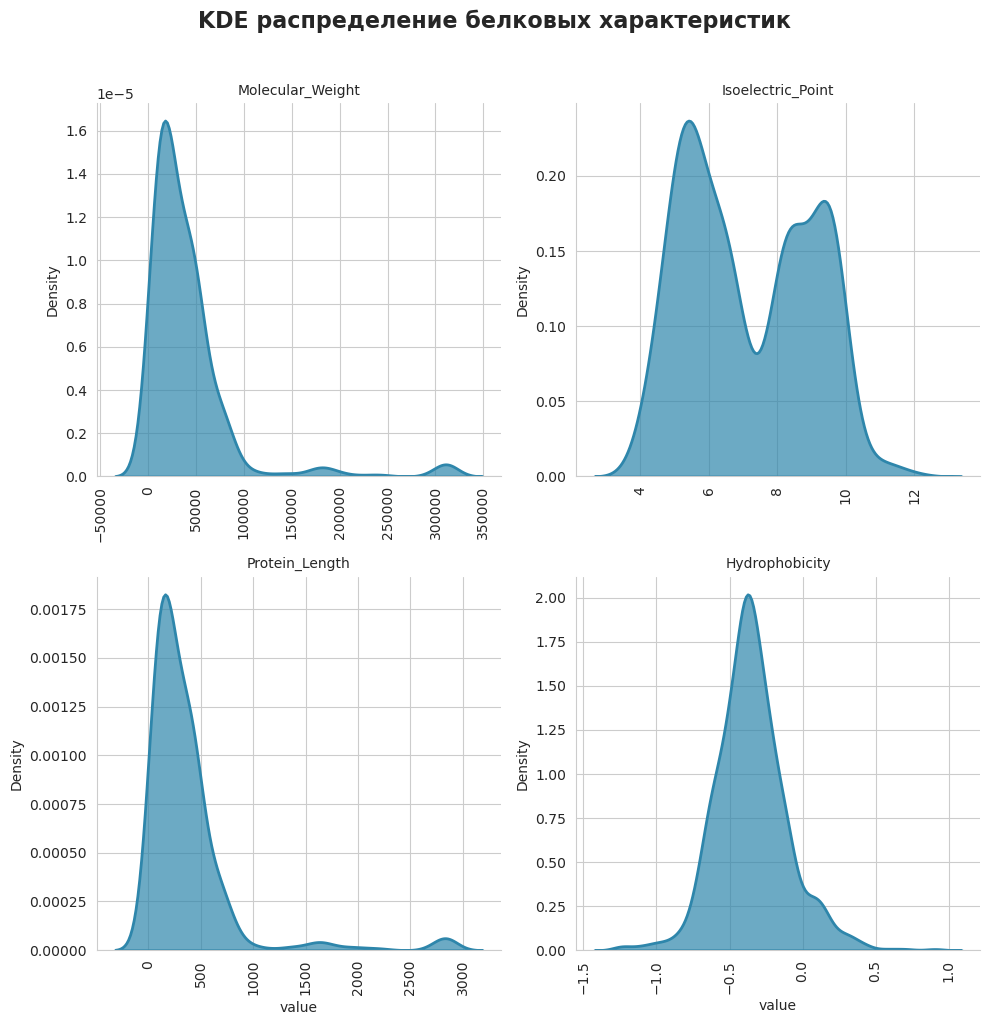

In [12]:
sns.set_style("whitegrid")
custom_palette = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D"]
sns.set_palette(custom_palette)

numeric_cols = ['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']

g = sns.FacetGrid(pd.melt(data[numeric_cols]), col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g.map(sns.kdeplot, "value", fill=True, alpha=0.7, linewidth=2)
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

g.fig.suptitle('KDE распределение белковых характеристик', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Анализ плотности распределения числовых характеристик белков методом ядерной оценки плотности (KDE) выявил существенные различия в характере распределения различных параметров. Распределение молекулярной массы демонстрирует выраженную правостороннюю асимметрию с концентрацией значений в области до 50 000 Да и длинным "хвостом" в сторону больших масс, достигающих 350 000 Да. Такая форма распределения указывает на преобладание белков средней массы в исследуемой выборке при наличии относительно небольшого количества высокомолекулярных комплексов.
Распределение изоэлектрической точки характеризуется бимодальным характером с двумя выраженными пиками в областях 5-6 и 8-9 единиц pH. Эта бимодальность может отражать наличие двух основных групп белков с различными кислотно-основными свойствами, что потенциально соответствует разным функциональным категориям или структурным классам белков в исследуемой выборке.
Распределение длины белковых последовательностей показывает экспоненциальный спад плотности вероятности с увеличением длины, что свидетельствует о преобладании белков средней длины (200-500 аминокислотных остатков) и относительно редком встречании очень длинных полипептидных цепей. Гистограмма гидрофобности демонстрирует близкое к нормальному распределение с центром вокруг значения -0.3, что указывает на преобладание умеренно гидрофильных белков в выборке. Относительно симметричная форма этого распределения suggests что гидрофобность является сбалансированным параметром без выраженных экстремальных значений в большинстве случаев.

### 6. Корреляционный анализ данных для оценки взаимосвязи между различными характеристиками белков

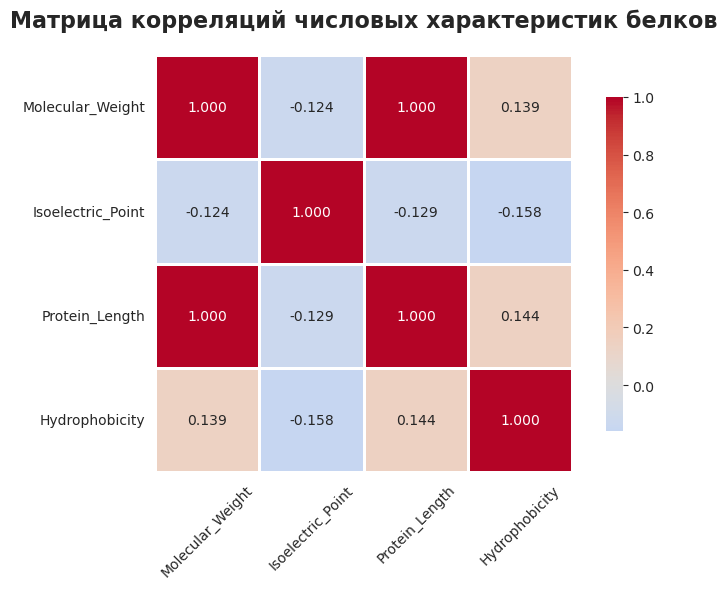

In [13]:
sns.set_style("whitegrid")
custom_palette = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D"]
sns.set_palette(custom_palette)

numeric_cols = ['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']
numeric_data = data[numeric_cols]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            linewidths=1,
            linecolor='white')
plt.title('Матрица корреляций числовых характеристик белков', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Гидрофобность как параметр проявляет относительно независимый характер, демонстрируя лишь слабые положительные связи с молекулярной массой (r = 0.139) и длиной белка (r = 0.144). Это позволяет предположить, что гидрофобные свойства в значительной степени определяются конкретной аминокислотной последовательностью и третичной структурой,чем общими размерными характеристиками.
Что касается изоэлектрической точки, она демонстрирует слабые отрицательные корреляции со всеми остальными параметрами. Наиболее выраженная, хотя всё равно умеренная, обратная связь наблюдается с гидрофобностью (r = -0.158), что может указывать на определённые стерические или электростатические ограничения в структуре белка. Также отмечается очень слабая отрицательная корреляция изоэлектрической точки с длиной белка (r = -0.129), что свидетельствует о минимальном влиянии размерных характеристик на кислотно-основные свойства белков.
Наиболее значимым выводом является наличие практически идеальной положительной корреляции (r = 1.000) между молекулярной массой и длиной белковой последовательности. Эта сильная линейная зависимость полностью соответствует биологическим ожиданиям, поскольку количество аминокислотных остатков напрямую определяет общую массу белка.

### 7. Анализ выбросов и аномалий данных

In [17]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print(f"Числовые колонки для анализа: {list(numeric_cols)}")

    print("\n📈 Описательная статистика:")
    print(data[numeric_cols].describe())
    
    print("\n🔍 Выбросы (по правилу 1.5*IQR):")
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"• {col}: {len(outliers)} выбросов ({len(outliers)/len(data)*100:.1f}%)")

Числовые колонки для анализа: ['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']

📈 Описательная статистика:
       Molecular_Weight  Isoelectric_Point  Protein_Length  Hydrophobicity
count       1000.000000        1000.000000       1000.0000     1000.000000
mean       40594.466956           7.138719        364.7770       -0.350712
std        48668.398237           1.829280        444.1324        0.243274
min         2461.023700           4.050028         22.0000       -1.241379
25%        14632.106050           5.466229        129.7500       -0.493217
50%        27240.156900           6.708843        246.0000       -0.367021
75%        48589.447675           8.746007        431.0000       -0.224514
max       312401.890000          11.999968       2851.0000        0.905682

🔍 Выбросы (по правилу 1.5*IQR):
• Molecular_Weight: 48 выбросов (4.8%)
• Isoelectric_Point: 0 выбросов (0.0%)
• Protein_Length: 49 выбросов (4.9%)
• Hydrophobicity: 38 выбросов (3.8%)


Анализ описательной статистики числовых характеристик белков выявил значительное разнообразие исследуемых параметров, что отражает широкий спектр структурных и функциональных особенностей белковых молекул. Молекулярная масса демонстрирует особенно широкий диапазон значений - от 2.5 кДа до 312.4 кДа при среднем значении 40.6 кДа. Такой значительный разброс (стандартное отклонение 48.7 кДа) указывает на присутствие как компактных пептидов, так и крупных белковых комплексов в исследуемой выборке. Медианное значение 27.2 кДа существенно ниже среднего, что свидетельствует о правосторонней асимметрии распределения, где большинство белков имеют относительно небольшую массу, но присутствуют отдельные тяжелые молекулы, смещающие среднее значение вверх.
Распределение изоэлектрических точек характеризуется большей однородностью - значения варьируются от 4.05 до 12.0 при среднем значении 7.14, что соответствует нейтральной и слабощелочной среде. Отсутствие выбросов по этому параметру и относительно небольшое стандартное отклонение (1.83) указывают на консервативность кислотно-основных свойств в исследуемой выборке белков. Длина белковых последовательностей также показывает значительный разброс - от 22 до 2851 аминокислотных остатков при медианном значении 246, что подтверждает наличие как коротких пептидов, так и протяженных полипептидных цепей.
Гидрофобность белков варьируется в диапазоне от -1.24 до 0.91 при среднем значении -0.35, что в целом соответствует преобладанию гидрофильных свойств в исследуемой выборке. Распределение всех параметров характеризуется умеренным количеством выбросов: 4.8% для молекулярной массы, 4.9% для длины белка и 3.8% для гидрофобности. Эти выбросы представляют особый интерес, поскольку могут соответствовать белка́м с уникальными структурными особенностями или специализированными функциями. Общий паттерн распределения параметров подтверждает гетерогенность выборки и наличие нескольких субпопуляций белков с различными физико-химическими свойствами, что обеспечивает репрезентативность данных для последующего статистического анализа и моделирования.

### 8. Построение интерактивного графика с использованием PairGrid

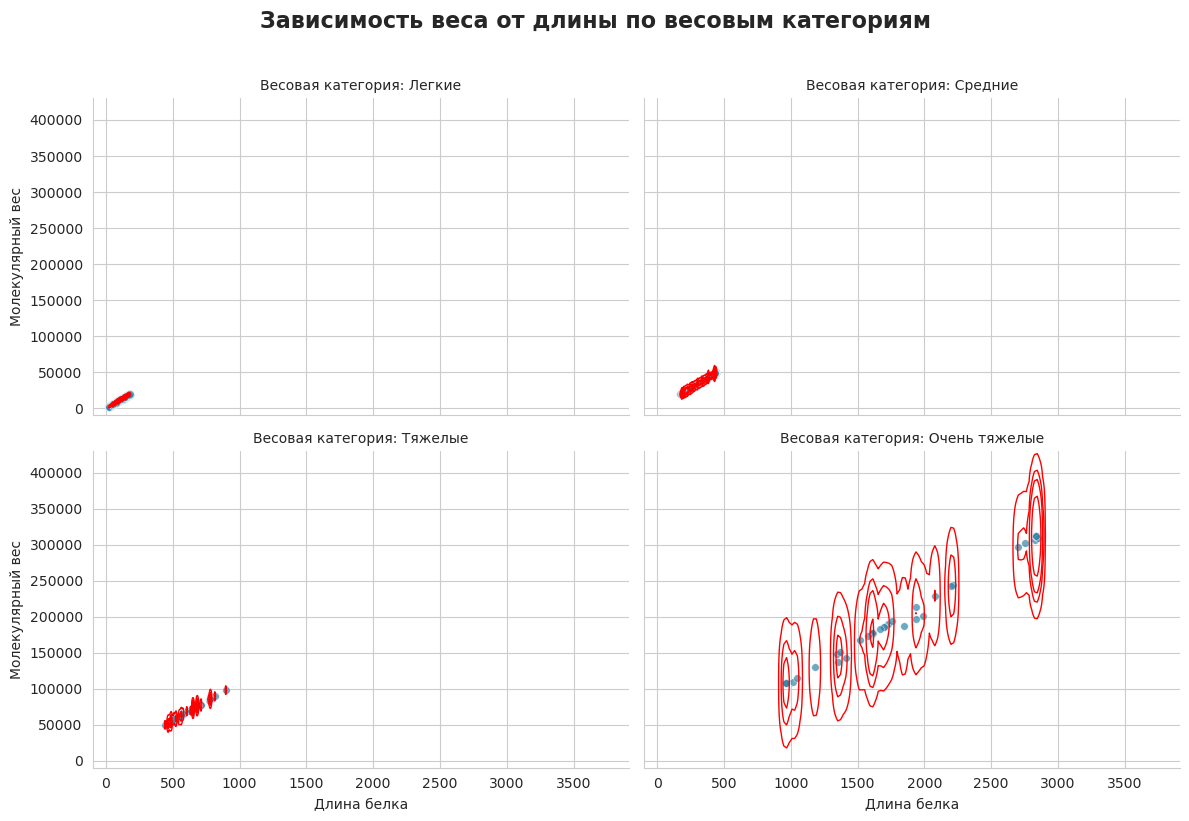

In [26]:
data['weight_category'] = pd.cut(data['Molecular_Weight'], 
                                bins=[0, 20000, 50000, 100000, 350000],
                                labels=['Легкие', 'Средние', 'Тяжелые', 'Очень тяжелые'])

data['length_category'] = pd.cut(data['Protein_Length'],
                                bins=[0, 100, 300, 1000, 3000],
                                labels=['Короткие', 'Средние', 'Длинные', 'Очень длинные'])

# FacetGrid по категориям веса
g = sns.FacetGrid(data, col='weight_category', col_wrap=2, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Protein_Length', 'Molecular_Weight', alpha=0.7, s=30)
g.map(sns.kdeplot, 'Protein_Length', 'Molecular_Weight', levels=5, color='red', linewidths=1)
g.set_titles("Весовая категория: {col_name}")
g.set_axis_labels("Длина белка", "Молекулярный вес")
g.fig.suptitle('Зависимость веса от длины по весовым категориям', 
               fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 9. Общие выводы:
- Проведенный исследовательский анализ данных выявил системные закономерности в физико-химических характеристиках белков Pseudomonas aeruginosa. Наиболее значимой находкой является практически идеальная линейная зависимость между молекулярной массой и длиной белковой последовательности (r = 1.000), что подтверждает фундаментальные биохимические принципы.
- Данные демонстрируют высокую гетерогенность - молекулярная масса варьируется от 2.5 до 312.4 кДа, а длина последовательностей от 22 до 2851 аминокислотных остатков, что отражает разнообразие функциональных классов белков в бактериальном протеоме. При этом распределения основных параметров характеризуются умеренным количеством выбросов (3.8-4.9%), которые могут представлять белки со специализированными функциями.
- Корреляционный анализ показал относительную независимость гидрофобности и изоэлектрической точки от размерных характеристик, что указывает на их определяющую роль в специфических биологических функциях. Визуализация распределений подтвердила правостороннюю асимметрию для массо-размерных параметров и бимодальность распределения изоэлектрических точек, потенциально соответствующую разным функциональным группам белков.